In [78]:
import pandas as pd
import os
import pathlib
from pathlib import Path
import time
import re
import string
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import datetime as dt
import pandas_datareader.data as pdr

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\erikl\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


---------------

## Combine Twitter CSVs into 1 large DataFrame:

In [10]:
path_directory = Path.cwd()
path_directory

WindowsPath('C:/Users/erikl/OneDrive/Desktop/FINTECH_Bootcamp/Project/Fintech_Project_2')

In [11]:
# Example of finding the correct files & getting a count:
# import os
# Find the number of CSVs for Musk Tweets
count = 0

# Using os.walk()
for dirpath, dirs, files in os.walk(path_directory): 
  for filename in files:
    if re.match(r'tweetLoop_\d+\.csv', filename):
        count += 1
        print(filename)
print(f'There are {count} csv files')

tweetLoop_1.csv
tweetLoop_10.csv
tweetLoop_11.csv
tweetLoop_12.csv
tweetLoop_13.csv
tweetLoop_14.csv
tweetLoop_15.csv
tweetLoop_16.csv
tweetLoop_17.csv
tweetLoop_18.csv
tweetLoop_19.csv
tweetLoop_2.csv
tweetLoop_20.csv
tweetLoop_21.csv
tweetLoop_22.csv
tweetLoop_23.csv
tweetLoop_24.csv
tweetLoop_25.csv
tweetLoop_26.csv
tweetLoop_27.csv
tweetLoop_28.csv
tweetLoop_29.csv
tweetLoop_3.csv
tweetLoop_30.csv
tweetLoop_31.csv
tweetLoop_32.csv
tweetLoop_33.csv
tweetLoop_34.csv
tweetLoop_35.csv
tweetLoop_36.csv
tweetLoop_37.csv
tweetLoop_38.csv
tweetLoop_39.csv
tweetLoop_4.csv
tweetLoop_40.csv
tweetLoop_41.csv
tweetLoop_42.csv
tweetLoop_43.csv
tweetLoop_44.csv
tweetLoop_45.csv
tweetLoop_46.csv
tweetLoop_47.csv
tweetLoop_48.csv
tweetLoop_49.csv
tweetLoop_5.csv
tweetLoop_50.csv
tweetLoop_51.csv
tweetLoop_52.csv
tweetLoop_53.csv
tweetLoop_54.csv
tweetLoop_55.csv
tweetLoop_6.csv
tweetLoop_7.csv
tweetLoop_8.csv
tweetLoop_9.csv
There are 55 csv files


In [12]:
# Example of finding the correct files & getting a count:
# import os
# Find the number of CSVs for Musk Tweets
count = 0
# creates a dict of dataframes, where each file has a separate dataframe
df_list = []

# Using os.walk()
for dirpath, dirs, files in os.walk(path_directory): 
  for filename in files:
    if re.match(r'tweetLoop_\d+\.csv', filename):
        df_list.append(pd.read_csv(filename))
        count += 1
        print(filename)
print(f'There are {count} csv files')

tweetLoop_1.csv
tweetLoop_10.csv
tweetLoop_11.csv
tweetLoop_12.csv
tweetLoop_13.csv
tweetLoop_14.csv
tweetLoop_15.csv
tweetLoop_16.csv
tweetLoop_17.csv
tweetLoop_18.csv
tweetLoop_19.csv
tweetLoop_2.csv
tweetLoop_20.csv
tweetLoop_21.csv
tweetLoop_22.csv
tweetLoop_23.csv
tweetLoop_24.csv
tweetLoop_25.csv
tweetLoop_26.csv
tweetLoop_27.csv
tweetLoop_28.csv
tweetLoop_29.csv
tweetLoop_3.csv
tweetLoop_30.csv
tweetLoop_31.csv
tweetLoop_32.csv
tweetLoop_33.csv
tweetLoop_34.csv
tweetLoop_35.csv
tweetLoop_36.csv
tweetLoop_37.csv
tweetLoop_38.csv
tweetLoop_39.csv
tweetLoop_4.csv
tweetLoop_40.csv
tweetLoop_41.csv
tweetLoop_42.csv
tweetLoop_43.csv
tweetLoop_44.csv
tweetLoop_45.csv
tweetLoop_46.csv
tweetLoop_47.csv
tweetLoop_48.csv
tweetLoop_49.csv
tweetLoop_5.csv
tweetLoop_50.csv
tweetLoop_51.csv
tweetLoop_52.csv
tweetLoop_53.csv
tweetLoop_54.csv
tweetLoop_55.csv
tweetLoop_6.csv
tweetLoop_7.csv
tweetLoop_8.csv
tweetLoop_9.csv
There are 55 csv files


In [13]:
# Make sure the lenght of the list of twitter CSV files = the count of twitter CSV files
len(df_list)

55

In [14]:
# Create a large DataFrame from all of the individual DataFrames in the list
tweet_df = pd.concat(f for f in df_list)

In [15]:
tweet_df.shape

(2080, 36)

In [16]:
display(tweet_df.head())
display(tweet_df.tail())

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1445087513585102853,1445086813631221762,2021-10-04 13:04:46 Central Daylight Time,2021-10-04,13:04:46,-500,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Teslarati', 'name': 'TESLARA...",NaN,NaN,NaN,NaN
1,1444840184500129797,1444840184500129797,2021-10-03 20:41:58 Central Daylight Time,2021-10-03,20:41:58,-500,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1444793562424614915,1444774412113285120,2021-10-03 17:36:42 Central Daylight Time,2021-10-03,17:36:42,-500,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'StianWalgermo', 'name': 'Wal...",NaN,NaN,NaN,NaN
3,1444778635425206273,1444702902132482049,2021-10-03 16:37:24 Central Daylight Time,2021-10-03,16:37:24,-500,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'TheStonkJunky', 'name': 'Hou...",NaN,NaN,NaN,NaN
4,1444647286424936452,1444360445888974850,2021-10-03 07:55:27 Central Daylight Time,2021-10-03,07:55:27,-500,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'PPathole', 'name': 'Pranay P...",NaN,NaN,NaN,NaN


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
95,1419481096723574787,1419340801226719238,2021-07-25 21:14:00 Central Daylight Time,2021-07-25,21:14:00,-500,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Rainmaker1973', 'name': 'Mas...",NaN,NaN,NaN,NaN
96,1419476203421978626,1419329588107390980,2021-07-25 20:54:34 Central Daylight Time,2021-07-25,20:54:34,-500,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'FrRonconi', 'name': 'Franco ...",NaN,NaN,NaN,NaN
97,1419370224156041219,1419348309098049541,2021-07-25 13:53:26 Central Daylight Time,2021-07-25,13:53:26,-500,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'RationalEtienne', 'name': 'P...",NaN,NaN,NaN,NaN
98,1419369383571361792,1419324078230487048,2021-07-25 13:50:06 Central Daylight Time,2021-07-25,13:50:06,-500,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'OwenSparks_', 'name': 'Owen ...",NaN,NaN,NaN,NaN
99,1419369098312654853,1419024731647393793,2021-07-25 13:48:58 Central Daylight Time,2021-07-25,13:48:58,-500,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Teslarati', 'name': 'TESLARA...",NaN,NaN,NaN,NaN


----------------------

## Clean Up Twitter DataFrame

In [17]:
tweet_df.shape

(2080, 36)

In [18]:
# Remove Duplicates:
tweet_df.drop_duplicates(inplace=True)
tweet_df.shape

(2080, 36)

In [19]:
tweet_df.head(3)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1445087513585102853,1445086813631221762,2021-10-04 13:04:46 Central Daylight Time,2021-10-04,13:04:46,-500,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Teslarati', 'name': 'TESLARA...",NaN,NaN,NaN,NaN
1,1444840184500129797,1444840184500129797,2021-10-03 20:41:58 Central Daylight Time,2021-10-03,20:41:58,-500,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1444793562424614915,1444774412113285120,2021-10-03 17:36:42 Central Daylight Time,2021-10-03,17:36:42,-500,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'StianWalgermo', 'name': 'Wal...",NaN,NaN,NaN,NaN


In [20]:
# Remove unnecessary columns:
tweet_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [21]:
tweet_df.drop(columns=['id', 'conversation_id', 'created_at', 'time', 'timezone', 'user_id', 'name', 'place', 'language',
       'urls', 'photos','link', 'retweet', 'quote_url', 'video', 'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest'], inplace=True)

In [22]:
tweet_df.head(3)

,date,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,cashtags
0,2021-10-04,elonmusk,@Teslarati @KlenderJoey This was *extremely* d...,[],1644,926,18535,[],[]
1,2021-10-03,elonmusk,Floki Frunkpuppy https://t.co/xAr8T0Jfdf,[],35260,35888,394867,[],[]
2,2021-10-03,elonmusk,@StianWalgermo @Tesla @WholeMarsBlog Wow!,[],645,341,8840,[],[]


In [23]:
# Only Keep rows that are relevant:  Create the Boolean Filters
mention_is_T = tweet_df['mentions'].str.contains('Bitcoin|btc', flags = re.IGNORECASE, regex = True, na = False)

In [24]:
hashtag_is_T = tweet_df['hashtags'].str.contains('Bitcoin|btc', flags = re.IGNORECASE, regex = True, na = False)

In [25]:
cashtags_is_T = tweet_df['cashtags'].str.contains('Bitcoin|btc', flags = re.IGNORECASE, regex = True, na = False)

In [26]:
tweet_is_T = tweet_df['tweet'].str.contains('Bitcoin|btc', flags = re.IGNORECASE, regex = True, na = False)

In [27]:
# Use the Filters to save only relevant tweets:
subject_tweets = tweet_df[(mention_is_T | hashtag_is_T | cashtags_is_T | tweet_is_T) == True].reset_index(drop=True)
display(subject_tweets.shape)
subject_tweets.head(10)

(30, 9)

,date,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,cashtags
0,2021-07-19,elonmusk,"@jack @BitcoinMagazine @CathieDWood Sure, I ha...",[],942,633,13078,[],[]
1,2021-07-19,elonmusk,@BitcoinMagazine @jack @CathieDWood During thi...,[],1000,854,10674,[],[]
2,2021-06-24,elonmusk,“That’s not funny!” – Bitcoin maxis,[],3545,3012,60476,[],[]
3,2021-06-24,elonmusk,How many Bitcoin maxis does it take to screw i...,[],17665,8006,100562,[],[]
4,2021-06-24,elonmusk,@jack Oh right … Bitcoin haha,[],871,769,7874,[],[]
5,2021-06-13,elonmusk,@Cointelegraph This is inaccurate. Tesla only ...,[],9968,10734,54252,[],[]
6,2021-06-05,elonmusk,@lexfridman @VitalikButerin @ethereum @Bitcoin...,[],2028,3255,24494,[],[]
7,2021-06-03,elonmusk,#Bitcoin 💔 https://t.co/lNnEfMdtJf,[],57374,21906,214935,['bitcoin'],[]
8,2021-05-26,elonmusk,@BTC_Archive 🤣🤣,[],910,316,8532,[],[]
9,2021-05-24,elonmusk,Spoke with North American Bitcoin miners. They...,[],26671,37834,325972,[],[]


In [28]:
subject_tweets.tail()

,date,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,cashtags
25,2021-02-07,elonmusk,"@itsALLrisky Doge appears to be inflationary, ...",[],1150,3440,15205,[],[]
26,2021-01-28,elonmusk,@DocumentingBTC The dollar is shorting itself,[],816,3033,28683,[],[]
27,2020-12-20,elonmusk,Bitcoin is almost as bs as fiat money,[],7959,9739,136598,[],[]
28,2020-12-20,elonmusk,Bitcoin is my safe word,[],6489,19130,233332,[],[]
29,2021-07-28,elonmusk,"@heydave7 We don’t have that many Bitcoin, but...",[],3425,1364,26082,[],[]


In [29]:
subject_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            30 non-null     object
 1   username        30 non-null     object
 2   tweet           30 non-null     object
 3   mentions        30 non-null     object
 4   replies_count   30 non-null     int64 
 5   retweets_count  30 non-null     int64 
 6   likes_count     30 non-null     int64 
 7   hashtags        30 non-null     object
 8   cashtags        30 non-null     object
dtypes: int64(3), object(6)
memory usage: 2.2+ KB


In [30]:
# Change Date column to DateTime:
subject_tweets['date'] = pd.to_datetime(subject_tweets['date'])

In [31]:
subject_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            30 non-null     datetime64[ns]
 1   username        30 non-null     object        
 2   tweet           30 non-null     object        
 3   mentions        30 non-null     object        
 4   replies_count   30 non-null     int64         
 5   retweets_count  30 non-null     int64         
 6   likes_count     30 non-null     int64         
 7   hashtags        30 non-null     object        
 8   cashtags        30 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 2.2+ KB


In [32]:
subject_tweets.set_index('date', inplace=True)
subject_tweets.head()

,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,cashtags
date,,,,,,,,
2021-07-19,elonmusk,"@jack @BitcoinMagazine @CathieDWood Sure, I ha...",[],942,633,13078,[],[]
2021-07-19,elonmusk,@BitcoinMagazine @jack @CathieDWood During thi...,[],1000,854,10674,[],[]
2021-06-24,elonmusk,“That’s not funny!” – Bitcoin maxis,[],3545,3012,60476,[],[]
2021-06-24,elonmusk,How many Bitcoin maxis does it take to screw i...,[],17665,8006,100562,[],[]
2021-06-24,elonmusk,@jack Oh right … Bitcoin haha,[],871,769,7874,[],[]


In [33]:
# Sort DataFrame by 'date' column:
subject_tweets.sort_values(by=['date'], inplace=True)
display(subject_tweets.head())
display(subject_tweets.tail())

,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,cashtags
date,,,,,,,,
2020-12-20,elonmusk,Bitcoin is almost as bs as fiat money,[],7959,9739,136598,[],[]
2020-12-20,elonmusk,Bitcoin is my safe word,[],6489,19130,233332,[],[]
2021-01-28,elonmusk,@DocumentingBTC The dollar is shorting itself,[],816,3033,28683,[],[]
2021-02-07,elonmusk,"@itsALLrisky Doge appears to be inflationary, ...",[],1150,3440,15205,[],[]
2021-02-18,elonmusk,@business Tesla’s action is not directly refle...,[],941,3307,26990,[],[]


,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,cashtags
date,,,,,,,,
2021-06-24,elonmusk,How many Bitcoin maxis does it take to screw i...,[],17665,8006,100562,[],[]
2021-06-24,elonmusk,“That’s not funny!” – Bitcoin maxis,[],3545,3012,60476,[],[]
2021-07-19,elonmusk,"@jack @BitcoinMagazine @CathieDWood Sure, I ha...",[],942,633,13078,[],[]
2021-07-19,elonmusk,@BitcoinMagazine @jack @CathieDWood During thi...,[],1000,854,10674,[],[]
2021-07-28,elonmusk,"@heydave7 We don’t have that many Bitcoin, but...",[],3425,1364,26082,[],[]


--------------------

## Sentiment Analysis:

In [34]:
# Create single function to build Sentiment Analysis Compound Score column:
def compound_sentiment_columns(text):
    # Function to clean text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Function to get compound sentiments
    sentiment = analyzer.polarity_scores(re_clean)
    compound = sentiment["compound"]
    return compound

In [35]:
# Use function to create Sentiment Compound score in DataFrame:
subject_tweets['Compound Sentiment'] = subject_tweets['tweet'].apply(lambda x: compound_sentiment_columns(x))
subject_tweets.head()

,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,cashtags,Compound Sentiment
date,,,,,,,,,
2020-12-20,elonmusk,Bitcoin is almost as bs as fiat money,[],7959,9739,136598,[],[],0.0000
2020-12-20,elonmusk,Bitcoin is my safe word,[],6489,19130,233332,[],[],0.4404
2021-01-28,elonmusk,@DocumentingBTC The dollar is shorting itself,[],816,3033,28683,[],[],0.0000
2021-02-07,elonmusk,"@itsALLrisky Doge appears to be inflationary, ...",[],1150,3440,15205,[],[],-0.3291
2021-02-18,elonmusk,@business Tesla’s action is not directly refle...,[],941,3307,26990,[],[],-0.1548


-----------------------

## Create BTC Price DataFrame & add PCT_Change column to tweets DataFrame:

In [99]:
# Create BTC dataframe:
start = dt.datetime(2020,10,6)
end = dt.datetime(2021,10,6)
btc_df = pdr.DataReader('BTC-USD','yahoo',start,end)
btc_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-02,49130.691406,47157.289062,47680.027344,48199.953125,2.663812e+10,48199.953125
2021-10-03,49456.777344,47045.003906,48208.906250,49112.902344,3.338317e+10,49112.902344
2021-10-04,51839.984375,49072.839844,49174.960938,51514.812500,3.587390e+10,51514.812500
2021-10-05,55568.464844,50488.191406,51486.664062,55361.449219,4.903473e+10,55361.449219
2021-10-06,55338.625000,53525.468750,55338.625000,53805.984375,3.680786e+10,53805.984375


In [100]:
btc_df['returns'] = btc_df['Adj Close'].pct_change()*100

In [101]:
btc_df.head()

,High,Low,Open,Close,Volume,Adj Close,returns
Date,,,,,,,
2020-10-05,10803.456055,10565.197266,10799.778320,10621.664062,2.226496e+10,10621.664062,NaN
2020-10-06,10687.268555,10591.963867,10619.803711,10679.136719,1.763439e+10,10679.136719,0.541089
2020-10-07,10939.799805,10569.823242,10677.625000,10923.627930,2.196212e+10,10923.627930,2.289429
2020-10-09,11442.210938,11056.940430,11059.142578,11296.361328,2.287798e+10,11296.361328,3.412176
2020-10-10,11428.813477,11288.627930,11296.082031,11384.181641,1.996863e+10,11384.181641,0.777421


In [102]:
# Get Returns for the next day with 
btc_df['1Day_Lagged_Return'] = btc_df.returns.shift()
btc_df = btc_df.dropna()
btc_df.head()

,High,Low,Open,Close,Volume,Adj Close,returns,1Day_Lagged_Return
Date,,,,,,,,
2020-10-07,10939.799805,10569.823242,10677.625000,10923.627930,2.196212e+10,10923.627930,2.289429,0.541089
2020-10-09,11442.210938,11056.940430,11059.142578,11296.361328,2.287798e+10,11296.361328,3.412176,2.289429
2020-10-10,11428.813477,11288.627930,11296.082031,11384.181641,1.996863e+10,11384.181641,0.777421,3.412176
2020-10-13,11539.977539,11307.831055,11429.047852,11429.506836,2.410343e+10,11429.506836,0.398142,0.777421
2020-10-14,11569.914062,11303.603516,11426.602539,11495.349609,2.448723e+10,11495.349609,0.576077,0.398142


In [103]:
# Join BTC DataFrame to twitter DataFrame:
twitter_sentiment_btc = subject_tweets.join(btc_df, how = 'outer')
twitter_sentiment_btc

,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,cashtags,Compound Sentiment,High,Low,Open,Close,Volume,Adj Close,returns,1Day_Lagged_Return
2020-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10939.799805,10569.823242,10677.625000,10923.627930,2.196212e+10,10923.627930,2.289429,0.541089
2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11442.210938,11056.940430,11059.142578,11296.361328,2.287798e+10,11296.361328,3.412176,2.289429
2020-10-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11428.813477,11288.627930,11296.082031,11384.181641,1.996863e+10,11384.181641,0.777421,3.412176
2020-10-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11539.977539,11307.831055,11429.047852,11429.506836,2.410343e+10,11429.506836,0.398142,0.777421
2020-10-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11569.914062,11303.603516,11426.602539,11495.349609,2.448723e+10,11495.349609,0.576077,0.398142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49130.691406,47157.289062,47680.027344,48199.953125,2.663812e+10,48199.953125,1.023789,-0.842641
2021-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49456.777344,47045.003906,48208.906250,49112.902344,3.338317e+10,49112.902344,1.894087,1.023789
2021-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51839.984375,49072.839844,49174.960938,51514.812500,3.587390e+10,51514.812500,4.890589,1.894087
2021-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55568.464844,50488.191406,51486.664062,55361.449219,4.903473e+10,55361.449219,7.467050,4.890589


In [104]:
# Drop Null Values:
twitter_sentiment_btc.dropna(inplace=True)

In [105]:
twitter_sentiment_btc.shape

(30, 17)

In [106]:
twitter_sentiment_btc.head()

,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,cashtags,Compound Sentiment,High,Low,Open,Close,Volume,Adj Close,returns,1Day_Lagged_Return
2020-12-20,elonmusk,Bitcoin is almost as bs as fiat money,[],7959.0,9739.0,136598.0,[],[],0.0000,24209.660156,23147.710938,23861.765625,23477.294922,3.784423e+10,23477.294922,-1.644490,3.163075
2020-12-20,elonmusk,Bitcoin is my safe word,[],6489.0,19130.0,233332.0,[],[],0.4404,24209.660156,23147.710938,23861.765625,23477.294922,3.784423e+10,23477.294922,-1.644490,3.163075
2021-01-28,elonmusk,@DocumentingBTC The dollar is shorting itself,[],816.0,3033.0,28683.0,[],[],0.0000,31891.300781,30023.207031,30441.041016,31649.605469,7.894816e+10,31649.605469,3.999201,-6.562212
2021-02-07,elonmusk,"@itsALLrisky Doge appears to be inflationary, ...",[],1150.0,3440.0,15205.0,[],[],-0.3291,39621.835938,37446.152344,39250.191406,38903.441406,6.550064e+10,38903.441406,-0.923369,2.940683
2021-02-18,elonmusk,@business Tesla’s action is not directly refle...,[],941.0,3307.0,26990.0,[],[],-0.1548,52474.105469,51015.765625,52140.972656,51679.796875,5.205472e+10,51679.796875,-0.899750,5.994196


---------------------------------------

## Assigning X features and y target Variables:

In [107]:
twitter_sentiment_btc.columns

Index(['username', 'tweet', 'mentions', 'replies_count', 'retweets_count',
       'likes_count', 'hashtags', 'cashtags', 'Compound Sentiment', 'High',
       'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'returns',
       '1Day_Lagged_Return'],
      dtype='object')

In [108]:
X = twitter_sentiment_btc[['replies_count', 'retweets_count', 'likes_count','Compound Sentiment']]
X.head()

,replies_count,retweets_count,likes_count,Compound Sentiment
2020-12-20,7959.0,9739.0,136598.0,0.0000
2020-12-20,6489.0,19130.0,233332.0,0.4404
2021-01-28,816.0,3033.0,28683.0,0.0000
2021-02-07,1150.0,3440.0,15205.0,-0.3291
2021-02-18,941.0,3307.0,26990.0,-0.1548


In [109]:
y = twitter_sentiment_btc['1Day_Lagged_Return']
y

2020-12-20     3.163075
2020-12-20     3.163075
2021-01-28    -6.562212
2021-02-07     2.940683
2021-02-18     5.994196
2021-02-18     5.994196
2021-03-12     3.207671
2021-03-24     0.384750
2021-03-24     0.384750
2021-03-24     0.384750
2021-04-26    10.238907
2021-04-27     1.872141
2021-05-12   -13.321745
2021-05-16    -0.650401
2021-05-16    -0.650401
2021-05-16    -0.650401
2021-05-17    -6.282382
2021-05-20    10.216344
2021-05-20    10.216344
2021-05-24    11.318184
2021-05-26     2.322721
2021-06-03     4.347513
2021-06-05    -3.638625
2021-06-13     9.972132
2021-06-24     2.785664
2021-06-24     2.785664
2021-06-24     2.785664
2021-07-19    -3.078858
2021-07-19    -3.078858
2021-07-28     1.494571
Name: 1Day_Lagged_Return, dtype: float64

In [110]:
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [111]:
#  Define the pipeline for scaling and model fitting
linear_model = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),  
    ("Linear Regression", LinearRegression())
])

sgd_model = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),  
    ("SGD Regression", SGDRegressor())
])

In [112]:
# Using fit function to transform, and fitting the model. 
linear_model.fit(X_train, y_train)
sgd_model.fit(X_train, y_train)

Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('SGD Regression', SGDRegressor())])

In [113]:
# Predicting target
y_pred_linear = linear_model.predict(X_test)
y_pred_sgd = sgd_model.predict(X_test)

In [114]:
# Checking score and absolute error

print('Pipeline 1 Mean Absolute Error for Linear Regression: ', mean_absolute_error(y_pred1, y_test))
print('Pipeline 1 Score for Linear Regression', linear_model.score(X_test, y_test))

print('Pipeline 2 Mean Absolute Error for SGD Regression: ', mean_absolute_error(y_pred2, y_test))
print('Pipeline 2 Score for SGD Regression', sgd_model.score(X_test, y_test))

Pipeline 1 Mean Absolute Error for Linear Regression:  3.823544002088014
Pipeline 1 Score for Linear Regression -0.15247038945928892
Pipeline 2 Mean Absolute Error for SGD Regression:  3.8222414070804835
Pipeline 2 Score for SGD Regression 0.09334151220648967


In [115]:
X_train

,replies_count,retweets_count,likes_count,Compound Sentiment
2021-05-12,123505.0,75704.0,500007.0,0.0000
2020-12-20,7959.0,9739.0,136598.0,0.0000
2021-02-18,941.0,3307.0,26990.0,-0.1548
2021-05-17,17840.0,17567.0,100626.0,0.0000
2021-02-18,2090.0,5996.0,34376.0,-0.2500
2021-05-16,2225.0,1999.0,15656.0,0.0000
2021-04-27,1313.0,2791.0,40178.0,0.4019
2021-06-05,2028.0,3255.0,24494.0,0.6908
2020-12-20,6489.0,19130.0,233332.0,0.4404
2021-01-28,816.0,3033.0,28683.0,0.0000


In [116]:
y_train

2021-05-12   -13.321745
2020-12-20     3.163075
2021-02-18     5.994196
2021-05-17    -6.282382
2021-02-18     5.994196
2021-05-16    -0.650401
2021-04-27     1.872141
2021-06-05    -3.638625
2020-12-20     3.163075
2021-01-28    -6.562212
2021-06-24     2.785664
2021-02-07     2.940683
2021-06-03     4.347513
2021-06-24     2.785664
2021-05-20    10.216344
2021-07-28     1.494571
2021-05-26     2.322721
2021-03-24     0.384750
2021-04-26    10.238907
2021-05-16    -0.650401
2021-05-24    11.318184
2021-03-12     3.207671
Name: 1Day_Lagged_Return, dtype: float64

In [117]:
y_pred_linear

array([3.0555427 , 1.72543037, 1.55541872, 3.10564973, 3.19808222,
       5.18219309, 2.35675397, 2.9904084 ])

In [118]:
y_pred_linear.reshape(-1,1)

array([[3.0555427 ],
       [1.72543037],
       [1.55541872],
       [3.10564973],
       [3.19808222],
       [5.18219309],
       [2.35675397],
       [2.9904084 ]])

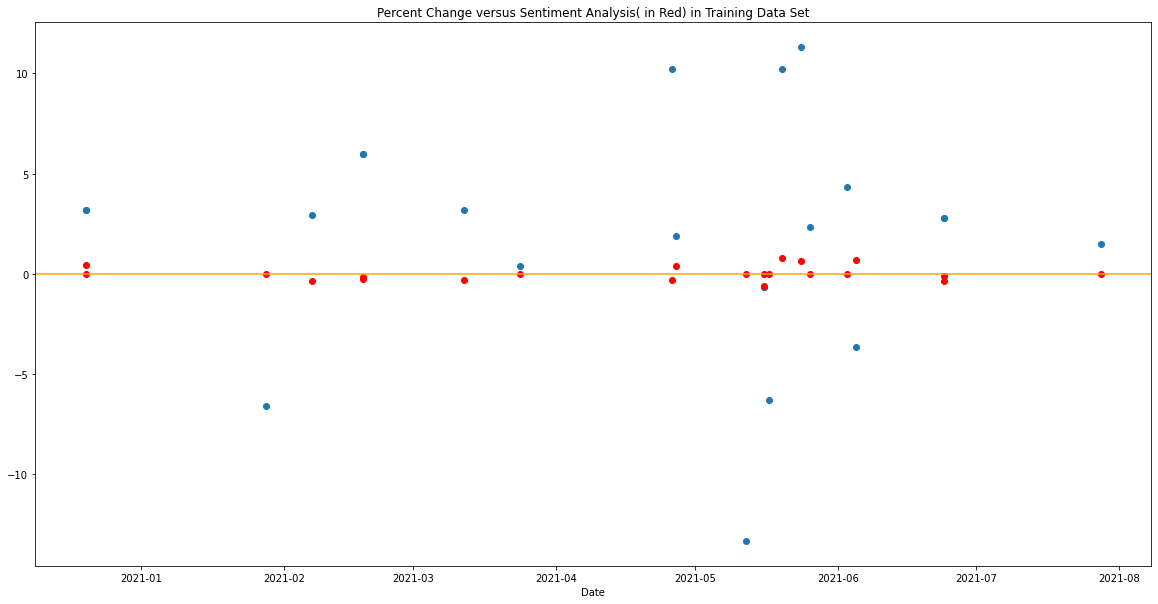

In [122]:
plt.figure(figsize=(20,10))
x = X_train.index
y1 = X_train['Compound Sentiment']
y2 = y_train
plt.scatter(x, y2)
plt.scatter(x, y1, c='red')
plt.axhline(0, color='orange')
plt.xlabel('Date')
plt.title('Percent Change versus Sentiment Analysis( in Red) in Training Data Set')
plt.show()

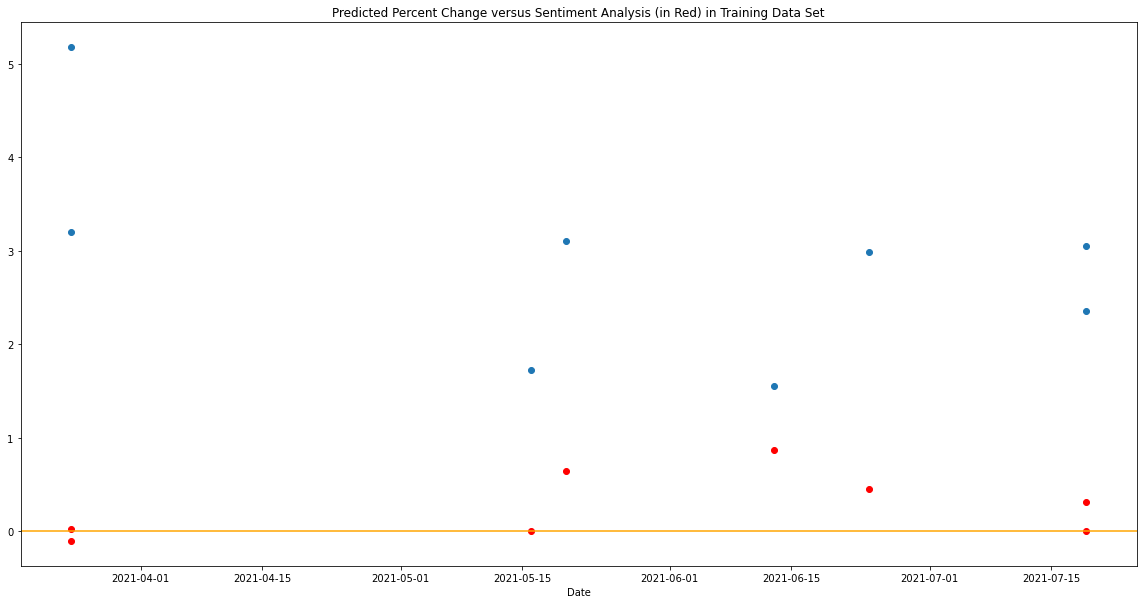

In [121]:
plt.figure(figsize=(20,10))
x = X_test.index
y1 = X_test['Compound Sentiment']
y2 = y_pred_linear
plt.scatter(x, y2)
plt.scatter(x, y1, c='red')
plt.axhline(0, color='orange')
plt.xlabel('Date')
plt.title('Predicted Percent Change versus Sentiment Analysis (in Red) in Training Data Set')
plt.show()

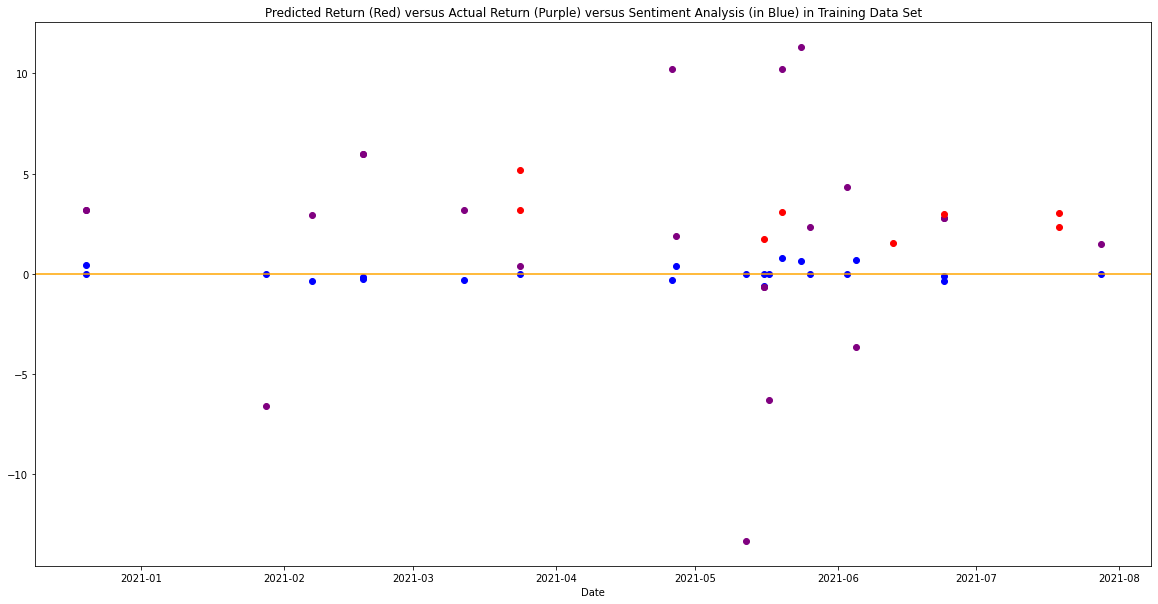

In [128]:
plt.figure(figsize=(20,10))
plt.scatter(X_train.index, X_train['Compound Sentiment'], color = 'blue')
plt.scatter(X_train.index, y_train, color = 'purple')
plt.scatter(X_test.index, y_pred_linear, color='red')
plt.axhline(0, color='orange')
plt.xlabel('Date')
plt.title('Predicted Return (Red) versus Actual Return (Purple) versus Sentiment Analysis (in Blue) in Training Data Set')
plt.savefig('Musk_Tweet_BTC_returns.png')
plt.show()